In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [ ]:
X = df.drop("DEATH_EVENT", axis =1).values
y = df["DEATH_EVENT"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() #it makes a prediction before looking at the dataset - prior probability - model has not seen any data - p(death event) - p(death event given)
gnb.fit(X_train, y_train) #P(death event | features) - makes a random guess - features are evidence
y_pred = gnb.predict(X_test) #Posterior probability - giving training data - model can now see the data and make newer predictions

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
classification_report(y_test,y_pred)

Accuracy: 0.8166666666666667


'              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88        46\n           1       0.60      0.64      0.62        14\n\n    accuracy                           0.82        60\n   macro avg       0.74      0.76      0.75        60\nweighted avg       0.82      0.82      0.82        60\n'

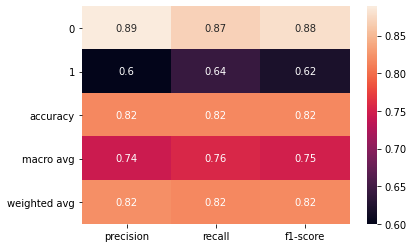

In [ ]:
report = classification_report(y_test,y_pred,output_dict = True)
import seaborn as sns
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[45  1]
 [ 3 11]]


In [ ]:
import seaborn as sns

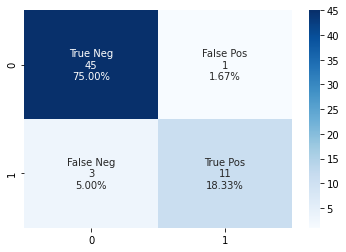

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = -1; cost_FP = 1; cost_FN = 2; cost_TN = 0;
cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [ ]:
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [ ]:
def profit_curve(cb, predict_probas, labels):
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [ ]:
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

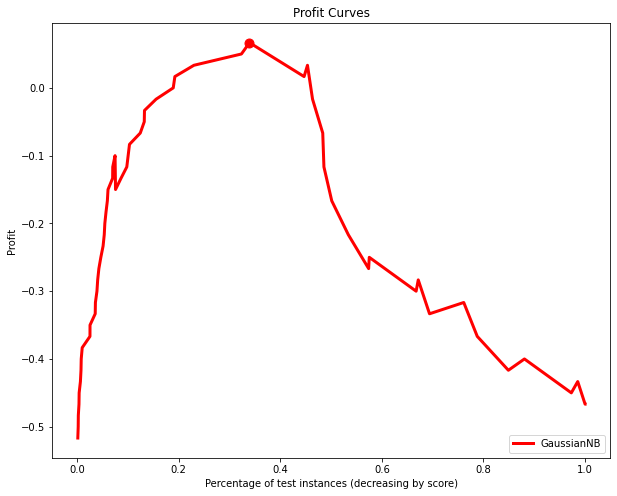

In [ ]:
models = [gnb]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b', 'm']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train, X_test, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

In [ ]:
pip install memory_profiler

In [ ]:
%load_ext memory_profiler

In [ ]:
%memit GaussianNB()

In [ ]:
%memit gnb.fit(X_train, y_train)

In [ ]:
%memit y_pred

In [ ]:
import time
%timeit GaussianNB()

In [ ]:
%timeit gnb.fit(X_train, y_train) 

In [ ]:
%timeit y_pred

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.plot_roc_curve(gnb, X_test, y_test)
plt.show()

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe
https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
https://github.com/SydneyLauren/Profit-curves-and-xkcd-plotting
https://community.datarobot.com/t5/resources/profit-curve/ta-p/7389
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
https://gist.github.com/fclesio/bb5871281debc07d75127552c56b08b5
sklearn-plotting-classification-report-gives-a-different-output-than-basic-avg
https://github.com/Ritvik-Sapra/EasyStatistics
https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe



